# Distributions

In [74]:
from collections import namedtuple
from random import randint

import numpy as np
import pandas as pd

Card = namedtuple('Card', ['suit', 'rank'])

SUITS = [ 'C', 'H', 'S', 'D' ]
RANKS = [ '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A' ]

def card_deck():
    return [ Card(suit, rank) for suit in SUITS for rank in RANKS ]

def draw_card(deck, replace:bool=True):
    pos = randint(0, len(deck) - 1)
    return deck[pos] if replace else deck.pop(pos)

def draw_cards(deck, n:int=1, replace:bool=True):
    return tuple( draw_card(deck, replace=replace) for i in range(0, n) )

def experiment_draw_cards(n:int=1, m:int=1, replace:bool=True):
    '''
    n -- number of cards to draw (default 1)
    m -- number of times to draw the cards (default 1)
    replace -- whether to replace the drawn card
    '''
    data = [ draw_cards(card_deck(), n=n, replace=replace) for i in range(0, m) ]
    return pd.DataFrame(data)

## Discrete uniform distribution

<Axes: xlabel='suit'>

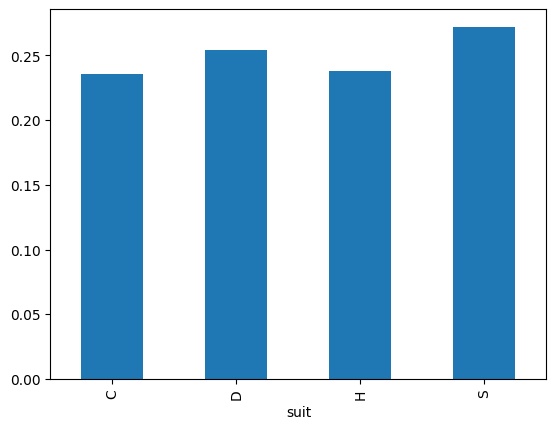

In [19]:
df = experiment_draw_cards(n=1, m=1000)

df['suit'] = df[0].map(lambda card: card.suit)
df['suit'].value_counts(normalize=True).sort_index().plot.bar()

## Bernoulli distribution

<Axes: xlabel='is_hearts'>

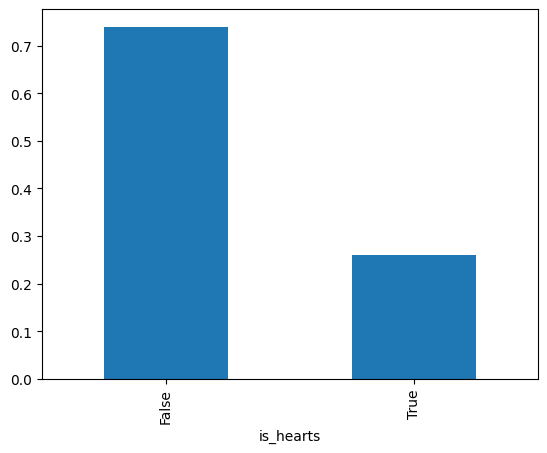

In [13]:
df['is_hearts'] = df['suit'] == 'H'
df['is_hearts'].value_counts(normalize=True).plot.bar()

## Binomial distribution

<Axes: xlabel='hearts'>

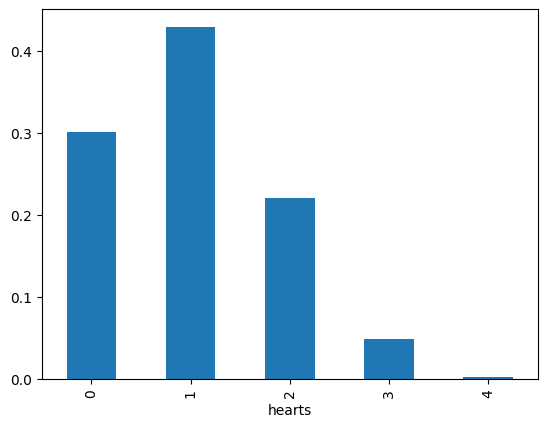

In [43]:
df = experiment_draw_cards(n=4, m=1000)

df['hearts'] = np.where(df.map(lambda card: card.suit) == 'H', 1, 0).sum(axis=1)

df['hearts'].value_counts(normalize=True).sort_index().plot.bar()

<Axes: xlabel='0'>

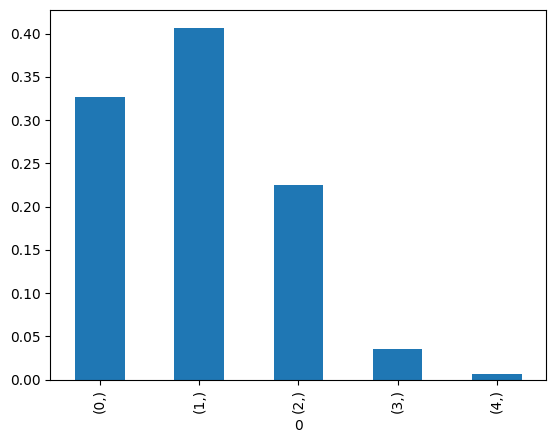

In [44]:
from scipy import stats

df = pd.DataFrame(stats.binom.rvs(n=4, p=0.25, size=1000))

df.value_counts(normalize=True).sort_index().plot.bar()

## Towards normal distribution

Instead of generating random values, we can use the *probability mass function* to calculate the theoretical probability for each outcome:

<Axes: >

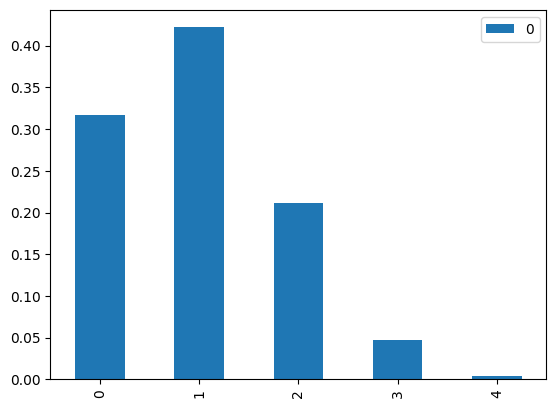

In [73]:
pd.DataFrame([stats.binom.pmf(k, n=4, p=0.25) for k in range(0, 5)]).plot.bar()

**Exercise:** Repeat the above experiment with increasing values of $n \in \{4, 40, 80\}$. How does the distribution change?

In [75]:
# TODO